In [3]:
#import module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import data
df = pd.read_csv("dataset.csv")

In [5]:
#view dataframe
print(df.head(10))

          ORIGIN SECTOR  TREATMENT_LOCATION  SEX  BIRTHPLACE_LOCATION  \
0  OUTSIDE USMER  STATE                   2    1                    2   
1  OUTSIDE USMER  STATE                  15    2                   15   
2  OUTSIDE USMER  STATE                   2    1                    2   
3  OUTSIDE USMER  STATE                  15    2                    9   
4  OUTSIDE USMER   IMSS                  25    2                   25   
5  OUTSIDE USMER   IMSS                  15    1                   15   
6  OUTSIDE USMER  STATE                  15    2                    9   
7  OUTSIDE USMER  STATE                  15    1                   15   
8  OUTSIDE USMER  STATE                   2    1                    2   
9  OUTSIDE USMER  STATE                  25    2                   25   

   PATIENT_LOCATION  MUNICIPALITY  HOSPITALIZED ADMISSION DATE  \
0                 2             4             1     2020-04-22   
1                15            33             2     2020-05-18  

In [6]:
# dataframe info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159793 entries, 0 to 159792
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ORIGIN                  159793 non-null  object
 1   SECTOR                  159793 non-null  object
 2   TREATMENT_LOCATION      159793 non-null  int64 
 3   SEX                     159793 non-null  int64 
 4   BIRTHPLACE_LOCATION     159793 non-null  int64 
 5   PATIENT_LOCATION        159793 non-null  int64 
 6   MUNICIPALITY            159793 non-null  int64 
 7   HOSPITALIZED            159793 non-null  int64 
 8   ADMISSION DATE          159793 non-null  object
 9   DATE_OF_FIRST_SYMPTOM   159793 non-null  object
 10  DATE_OF_DEATH           19080 non-null   object
 11  INTUBATED               159793 non-null  int64 
 12  PNEUMONIA               159793 non-null  int64 
 13  AGE                     159793 non-null  int64 
 14  NATIONALITY             159793 non-n

In [7]:
# import dictionary data
data = pd.read_excel("data_dictionary.xlsx")

print(data)


                  variable                                              value
0                      SEX                   1 = Female, 2= Male, 99= Unknown
1             HOSPITALIZED                          1 = NO, 2=YES, 99=Unknown
2                intubated  1=YES, 2=NO, 97=DOES NOT APPLY, 98=IGNORED, 99...
3                PNEUMONIA  1=YES, 2=NO, 97=DOES NOT APPLY, 98=IGNORED, 99...
4                PREGNANCY  1=YES, 2=NO, 97=DOES NOT APPLY, 98=IGNORED, 99...
5   speaks_native_language  1=YES, 2=NO, 97=DOES NOT APPLY, 98=IGNORED, 99...
6                 DIABETES  1=YES, 2=NO, 97=DOES NOT APPLY, 98=IGNORED, 99...
7                     COPD  1=YES, 2=NO, 97=DOES NOT APPLY, 98=IGNORED, 99...
8                   ASTHMA  1=YES, 2=NO, 97=DOES NOT APPLY, 98=IGNORED, 99...
9                 INMUSUPR  1=YES, 2=NO, 97=DOES NOT APPLY, 98=IGNORED, 99...
10            HYPERTENSION  1=YES, 2=NO, 97=DOES NOT APPLY, 98=IGNORED, 99...
11           OTHER_DISEASE  1=YES, 2=NO, 97=DOES NOT APPLY, 98=I

In [8]:
data['variable'] = data['variable'].str.upper()

In [9]:
def parse(value_string):
    return {
        int(key.strip()): value.strip()
        for item in value_string.split(",")
        for key, value in [item.split("=")]
    }

# Create a dictionary for each 'variable' based on the parsed 'value'
data_dict = {
    row['variable']: parse(row['value'])
    for _, row in data.iterrows()
}

print(data_dict)

for col in df.columns:
    if col in data_dict:  # Check if the column has a corresponding dictionary
        df[col] = df[col].map(data_dict[col])  # Map values

print(df)

{'SEX': {1: 'Female', 2: 'Male', 99: 'Unknown'}, 'HOSPITALIZED': {1: 'NO', 2: 'YES', 99: 'Unknown'}, 'INTUBATED': {1: 'YES', 2: 'NO', 97: 'DOES NOT APPLY', 98: 'IGNORED', 99: 'UNKNOWN'}, 'PNEUMONIA': {1: 'YES', 2: 'NO', 97: 'DOES NOT APPLY', 98: 'IGNORED', 99: 'UNKNOWN'}, 'PREGNANCY': {1: 'YES', 2: 'NO', 97: 'DOES NOT APPLY', 98: 'IGNORED', 99: 'UNKNOWN'}, 'SPEAKS_NATIVE_LANGUAGE': {1: 'YES', 2: 'NO', 97: 'DOES NOT APPLY', 98: 'IGNORED', 99: 'UNKNOWN'}, 'DIABETES': {1: 'YES', 2: 'NO', 97: 'DOES NOT APPLY', 98: 'IGNORED', 99: 'UNKNOWN'}, 'COPD': {1: 'YES', 2: 'NO', 97: 'DOES NOT APPLY', 98: 'IGNORED', 99: 'UNKNOWN'}, 'ASTHMA': {1: 'YES', 2: 'NO', 97: 'DOES NOT APPLY', 98: 'IGNORED', 99: 'UNKNOWN'}, 'INMUSUPR': {1: 'YES', 2: 'NO', 97: 'DOES NOT APPLY', 98: 'IGNORED', 99: 'UNKNOWN'}, 'HYPERTENSION': {1: 'YES', 2: 'NO', 97: 'DOES NOT APPLY', 98: 'IGNORED', 99: 'UNKNOWN'}, 'OTHER_DISEASE': {1: 'YES', 2: 'NO', 97: 'DOES NOT APPLY', 98: 'IGNORED', 99: 'UNKNOWN'}, 'CARDIOVASCULAR': {1: 'YES', 

In [10]:
#Q2
# Define age bins and labels
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Cut the 'AGE' column into the defined bins
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=False)


In [11]:
# Count the occurrences in each age group
age_group_counts = df['AGE_GROUP'].value_counts().sort_index()

print(age_group_counts)

AGE_GROUP
0-10       1614
11-20      3131
21-30     20485
31-40     35386
41-50     36445
51-60     30453
61-70     18604
71-80      9519
81-90      3568
91-100      559
Name: count, dtype: int64


In [12]:
#print(df.head(10))

#df.to_csv("dataset_cleaned.csv", index=False)

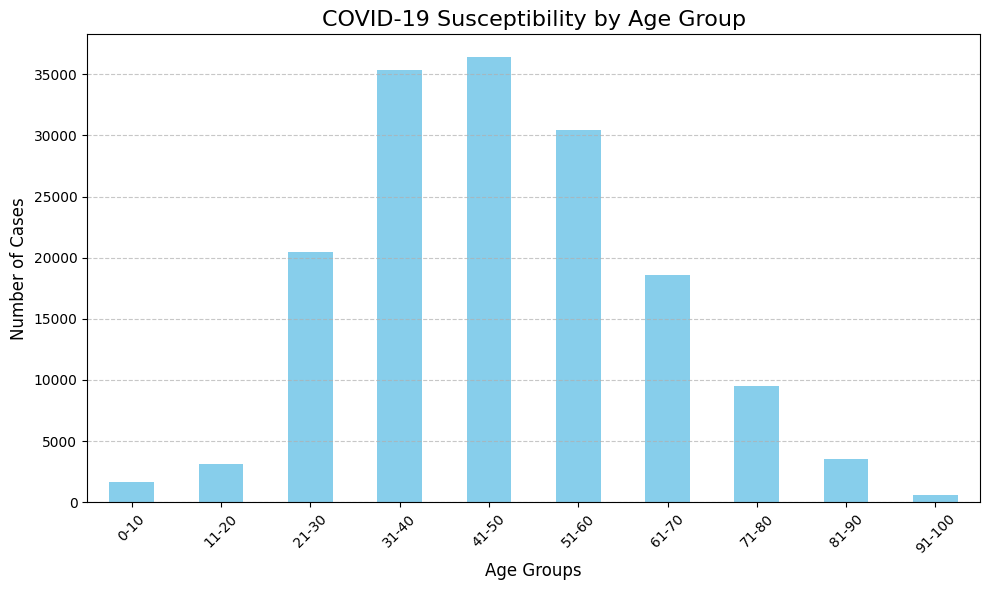

In [13]:
#Q3
# Cut the 'AGE' column into the defined bins
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=False)

# Count the occurrences in each age group
age_group_counts = df['AGE_GROUP'].value_counts().sort_index()

# Plotting the bar chart based on age group counts from Question 2
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('COVID-19 Susceptibility by Age Group', fontsize=16)
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

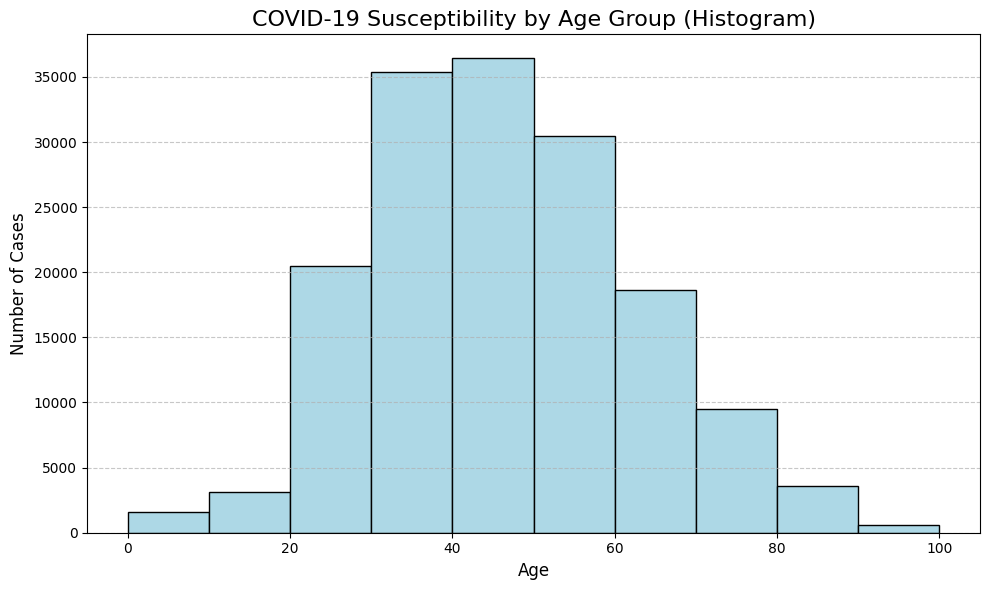

In [14]:
#Q4
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['AGE'], bins=age_bins, edgecolor='black', color='lightblue')

# Adding labels and title
plt.title('COVID-19 Susceptibility by Age Group (Histogram)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_10448\145229322.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_distribution = df.groupby(['AGE_GROUP', 'SEX']).size().unstack()


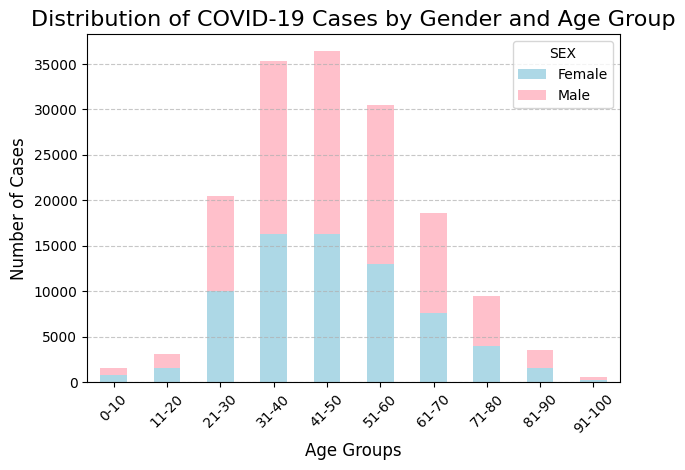

In [15]:
#Q5

# Cut the 'AGE' column into the defined bins
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=False)

# Group by age group and gender, then count occurrences
age_gender_distribution = df.groupby(['AGE_GROUP', 'SEX']).size().unstack()

# Plotting the distribution by gender and age group
age_gender_distribution.plot(kind='bar', stacked=True, color=['lightblue', 'pink'])

# Adding labels and title
plt.title('Distribution of COVID-19 Cases by Gender and Age Group', fontsize=16)
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

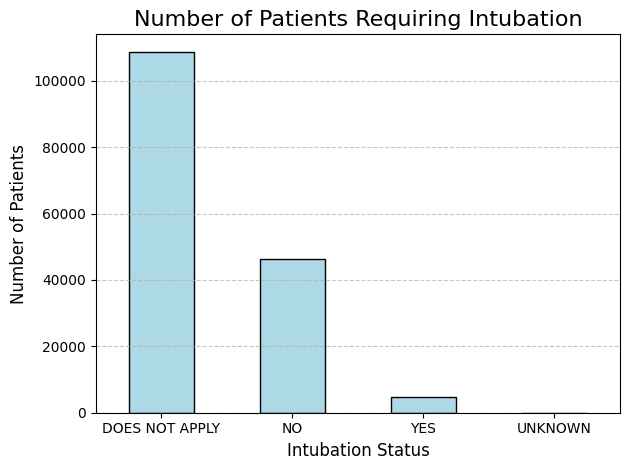

In [16]:
#Q6
# Count the occurrences of intubation statuses
intubation_counts = df['INTUBATED'].value_counts()

# Plotting the intubation status counts
intubation_counts.plot(kind='bar', color='lightblue', edgecolor='black')

# Adding labels and title
plt.title('Number of Patients Requiring Intubation', fontsize=16)
plt.xlabel('Intubation Status', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

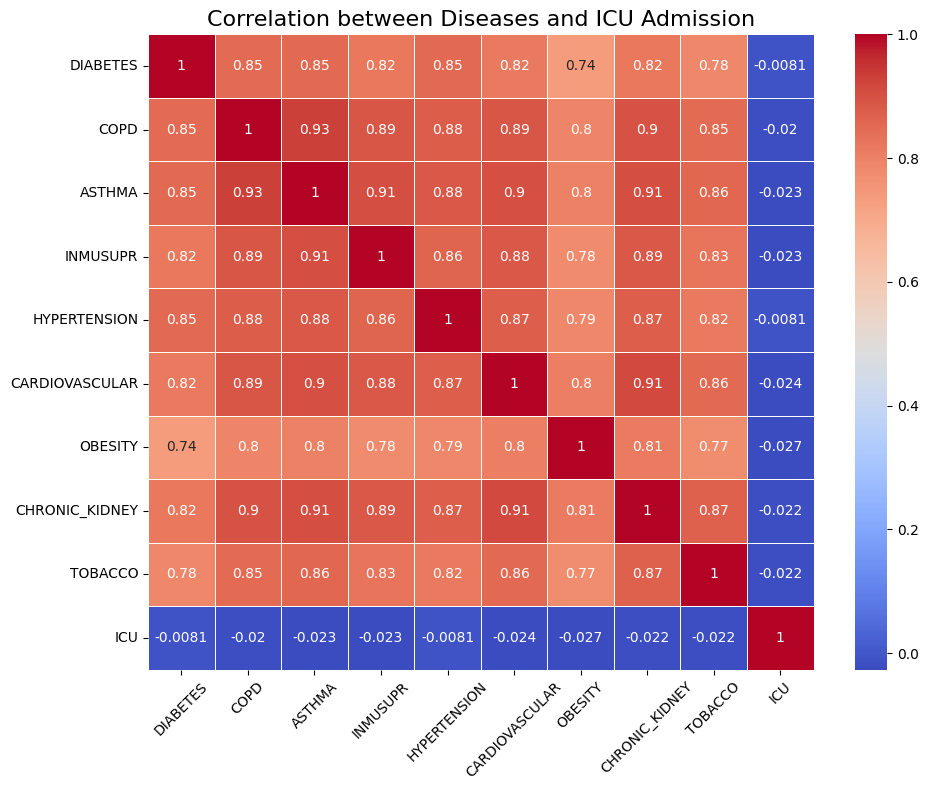

In [41]:
#Q7
df_new = pd.read_csv("dataset.csv")
diseases = ['DIABETES', 'COPD', 'ASTHMA', 'INMUSUPR', 'HYPERTENSION', 'CARDIOVASCULAR', 'OBESITY', 'CHRONIC_KIDNEY', 'TOBACCO']
df_diseases_icu = df_new[diseases + ['ICU']]

# Convert all columns to numeric to handle categorical data properly
# df_diseases_icu = df_diseases_icu.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
correlation_matrix = df_diseases_icu.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Adding labels and title
plt.title('Correlation between Diseases and ICU Admission', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

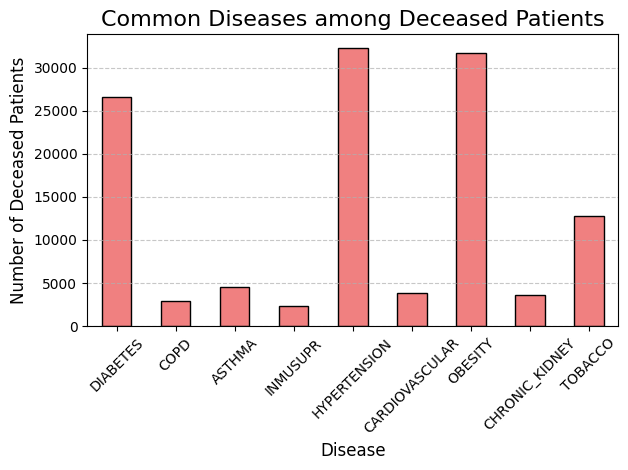

In [40]:
# Filter the dataset for deceased patients
deceased_df = df[df['OUTCOME'] == "POSITIVE"]

# List of diseases to analyze
diseases = ['DIABETES', 'COPD', 'ASTHMA', 'INMUSUPR', 'HYPERTENSION', 'CARDIOVASCULAR', 'OBESITY', 'CHRONIC_KIDNEY', 'TOBACCO']

# Count the occurrences of each disease among deceased patients
disease_counts = deceased_df[diseases].apply(lambda x: (x == "YES").sum())

# Plot the bar chart for common diseases

disease_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
#sns.catplot(x="OUTCOME",kind='count', color='lightcoral', edgecolor='black', data = disease_counts)

# Adding labels and title
plt.title('Common Diseases among Deceased Patients', fontsize=16)
plt.xlabel('Disease', fontsize=12)
plt.ylabel('Number of Deceased Patients', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()